In [70]:
!pip install minisom

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [72]:
(x_train, x_test), (y_train, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [73]:
x_train = x_train[:30000]
y_train = y_train[:30000]
print(x_train.shape, y_train.shape)

(30000, 28, 28) (10000, 28, 28)


In [74]:
x_test = x_train[30000:38000]
y_test = y_test[:8000]
print(x_test.shape, y_test.shape)

(0, 28, 28) (8000,)


In [75]:
x_test.shape

(0, 28, 28)

In [76]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [77]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [78]:
from minisom import MiniSom
som = MiniSom(x = 20, y = 20, input_len = 784, sigma = 3.0, learning_rate = 0.4)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

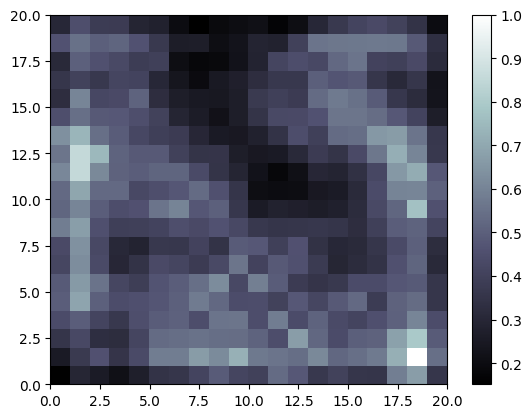

In [79]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

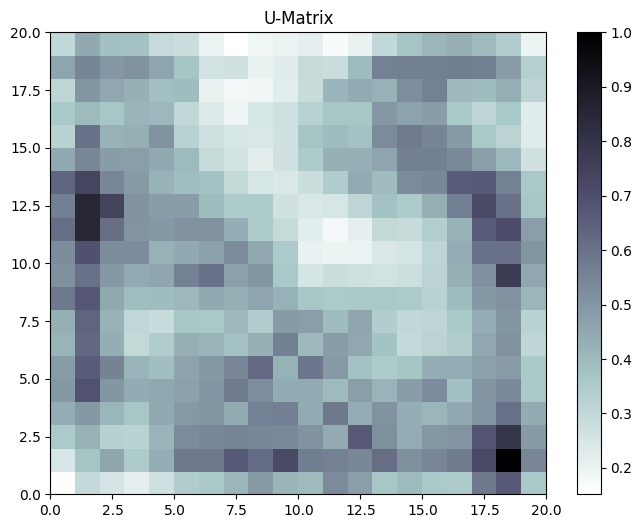

In [80]:
import matplotlib.pyplot as plt
u_matrix = som.distance_map()
plt.figure(figsize=(8 , 6))
plt.pcolor(u_matrix.T, cmap='bone_r')
plt.colorbar()
plt.title('U-Matrix')
plt.show()

In [81]:
cluster = {}

for i, x in enumerate(x_train):
    winner = som.winner(x)
    if winner not in cluster:
        cluster[winner] = []
    cluster[winner].append(i)

21


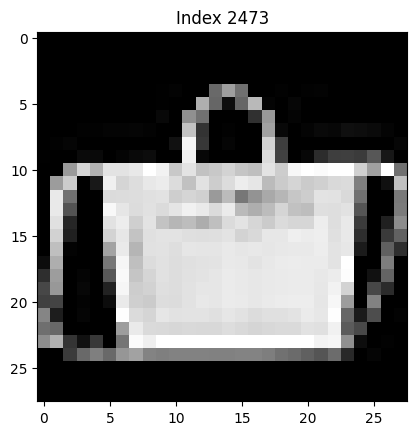

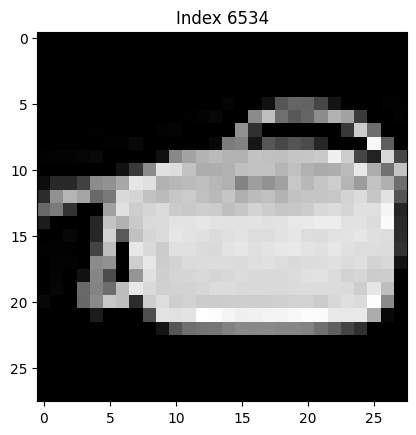

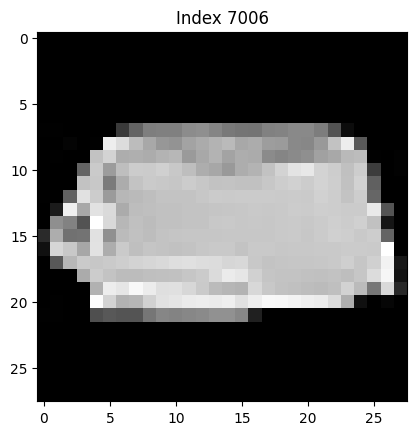

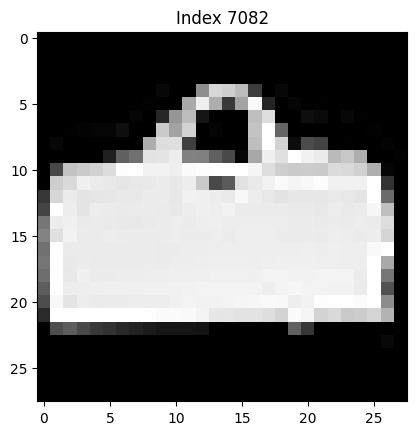

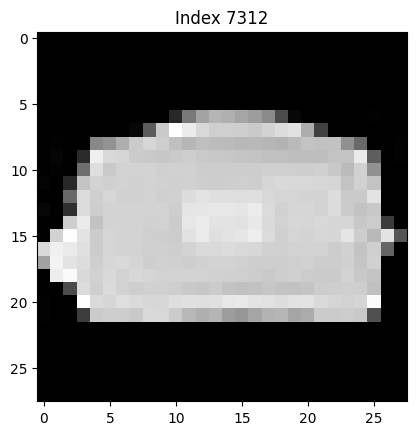

In [85]:
import matplotlib.pyplot as plt
print(len(cluster[(1,11)]))
for i in cluster[(1, 11)][:5]:
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Index {i}")
    plt.show()